In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        2
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        0
197   32                 126                      74        1
198   32                 137                      18        0
199   30                 137                      83        1

[200 rows x 4 columns]
[[40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]
 [40.32520325 44.15447154 49.82926829]]
Quality of Clustering:  0.3842499551758728


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


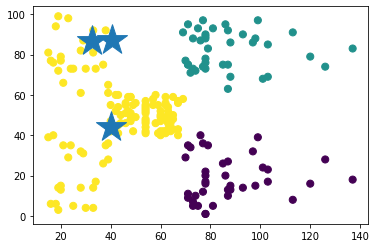

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters = 3, random_state = 123)
model = kmeans.fit(X)
cluster_labels = kmeans.predict(X)
X['Cluster'] = cluster_labels
print(X)
C = kmeans.cluster_centers_
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(C)
print("Quality of Clustering: ", sil)
#For 2-D plot of the data points along with the centroids …
fig = plt.figure()
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels,
            s=50, cmap='viridis');
plt.scatter(C[:, 0], C[:, 1], marker='*', s=1000)



The following code block implements k-means algorithm from the scratch

[array([19, 15, 39,  2]), array([21, 15, 81,  2]), array([20, 16,  6,  2])]
[[40.32520325 44.15447154 49.82926829  2.        ]
 [32.69230769 86.53846154 82.12820513  1.        ]
 [40.39473684 87.         18.63157895  0.        ]]
Quality of Clustering:  0.3842499551758728


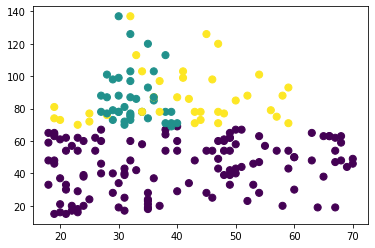

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters_kmeans(X, n_clusters, rseed=2):
  
    # 1. Randomly choose clusters
    #rng = np.random.RandomState(rseed)
    #i = rng.permutation(X.shape[0])[:n_clusters]
    #centers = X[i]
    
    centers = [X[0], X[1], X[2]]
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels
X = np.array(X)
centers, cluster_labels = find_clusters_kmeans(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels,
            s=50, cmap='viridis');
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(centers)
print("Quality of Clustering: ", sil)